# Joining Processed Data

This section joins data processed from data_extraction.ipynb and returns numpy representation of pandas dfs compatible with sklearn. 

NA values in df1 and df2 are filled with medians of their respective columns (may be testing other options like cosine similarity for missing data).

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
#import keras
#from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler

In [2]:
demos = pd.read_csv("demos_clean.csv")
demos.drop(demos.columns[[0]], axis=1, inplace=True)
all_achi = pd.read_csv("all_achi.csv")
all_achi.drop(all_achi.columns[[0]], axis=1, inplace=True)
sw_achi = pd.read_csv("sw_achi.csv")
sw_achi.drop(sw_achi.columns[[0]], axis=1, inplace=True)

In [3]:
df1 = pd.merge(demos, all_achi, on='school_id', how='inner')
df1 = df1.drop(columns=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'])
#for i in range(len(df1.columns)):
#    df1.iloc[:, i] = df1.iloc[:, i].fillna(df1.iloc[:, i].median(skipna=True))
df1 = df1.dropna(how='any')

In [4]:
df1_sw = pd.merge(demos, sw_achi, on='school_id', how='inner')
df1_sw = df1_sw.drop(columns=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'])
#for i in range(len(df1_sw.columns)):
#    df1_sw.iloc[:, i] = df1_sw.iloc[:, i].fillna(df1_sw.iloc[:, i].median(skipna=True))
df1_sw = df1_sw.dropna(how='any')

In [5]:
grad = pd.read_csv("grad_clean.csv")
grad.drop(grad.columns[[0]], axis=1, inplace=True)
financials = pd.read_csv("financials_clean.csv")
financials.drop(financials.columns[[0]], axis=1, inplace=True)

In [6]:
df2 = pd.merge(demos, grad, on='school_id', how='inner')
df2 = pd.merge(df2, financials, on='district_id', how='inner')
df2 = pd.merge(df2, all_achi, on='school_id', how='inner')

In [7]:
#drop attributes used for data processing
df2 = df2.drop(columns=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'])
#drop attributes that were pulled, but not predictive
df2 = df2.drop(columns=['total_rev', 'total_locrev', 'pta_rev', 'prop_taxes', 'sales_taxes', 'public_utility_taxes', 'income_taxes', 'other_taxes'])
df2.total_salaries = df2.total_salaries/df2.total
df2.salaries_instruction = df2.salaries_instruction/df2.total
df2.salaries_teachers = df2.salaries_teachers/df2.total
df2 = df2.rename(columns={'total_salaries': 'total_salaries_ps', 'salaries_instruction': 'salaries_instruction_ps', 'salaries_teachers': 'salaries_teachers_ps'})

In [8]:
#impute na with median
for i in range(len(df2.columns)):
    df2.iloc[:, i] = df2.iloc[:, i].fillna(df2.iloc[:, i].median(skipna=True))

In [9]:
df2_sw = pd.merge(demos, grad, on='school_id', how='inner')
df2_sw = pd.merge(df2_sw, financials, on='district_id', how='inner')
df2_sw = pd.merge(df2_sw, sw_achi, on='school_id', how='inner')

In [10]:
#drop attributes used for data processing
df2_sw = df2_sw.drop(columns=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'])
#drop attributes that were pulled, but not predictive
df2_sw = df2_sw.drop(columns=['total_rev', 'total_locrev', 'pta_rev', 'prop_taxes', 'sales_taxes', 'public_utility_taxes', 'income_taxes', 'other_taxes'])
#engineer features so they reflect per student values
df2_sw.total_salaries = df2_sw.total_salaries/df2_sw.total
df2_sw.salaries_instruction = df2_sw.salaries_instruction/df2_sw.total
df2_sw.salaries_teachers = df2_sw.salaries_teachers/df2_sw.total
df2_sw = df2_sw.rename(columns={'total_salaries': 'total_salaries_ps', 'salaries_instruction': 'salaries_instruction_ps', 'salaries_teachers': 'salaries_teachers_ps'})

In [11]:
#impute na with median
for i in range(len(df2_sw.columns)):
    df2_sw.iloc[:, i] = df2_sw.iloc[:, i].fillna(df2_sw.iloc[:, i].median(skipna=True))

# Linear Regression

## DF1 Features 

In [12]:
data = df1.values

In [13]:
features = data[:, 0:10]
labels = data[:, 10]

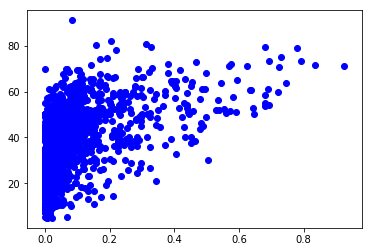

In [14]:
plt.scatter(features[:, 1], labels, color='blue')

In [15]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [16]:
lr = LinearRegression(normalize=True)

In [17]:
model = lr.fit(train, train_labels)

In [18]:
score = model.score(test, test_labels)
print(score)

0.36495846471631144


## DF2 Features

In [19]:
data_add = df2.values

In [20]:
features_add = data_add[:, 0:20]
labels_add = data_add[:, 20]

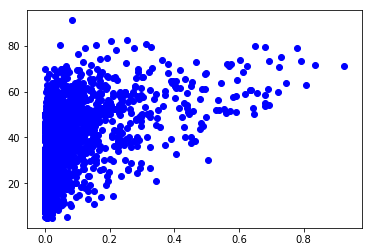

In [21]:
plt.scatter(features_add[:, 1], labels_add, color='blue')

In [22]:
train_add, test_add, train_labels_add, test_labels_add = train_test_split(features_add, labels_add, test_size = 0.2)

In [23]:
lr_add = LinearRegression(normalize=True)

In [24]:
model_add = lr_add.fit(train_add, train_labels_add)

In [25]:
score_add = model_add.score(test_add, test_labels_add)
print(score_add)

0.42825540627261904


## DF1 Features (on sw_achi)

In [26]:
data = df1_sw.values

In [27]:
features = data[:, 0:10]
labels = data[:, 10]

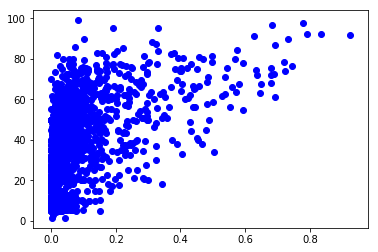

In [28]:
plt.scatter(features[:, 1], labels, color='blue')

In [29]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

In [31]:
model = lr.fit(train, train_labels)

In [32]:
score = model.score(test, test_labels)
print(score)

0.5291191825888847


## DF2 Features (on sw_achi)

In [33]:
data_add = df2_sw.values

In [34]:
features_add = data_add[:, 0:20]
labels_add = data_add[:, 20]

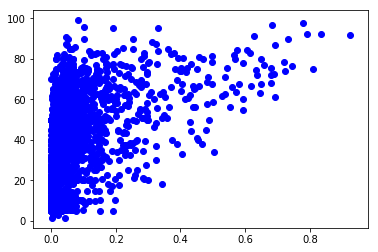

In [35]:
plt.scatter(features_add[:, 1], labels_add, color='blue')

In [36]:
train_add, test_add, train_labels_add, test_labels_add = train_test_split(features_add, labels_add, test_size = 0.2)

In [37]:
lr_add = LinearRegression(normalize=True)

In [38]:
model_add = lr_add.fit(train_add, train_labels_add)

In [39]:
score_add = model_add.score(test_add, test_labels_add)
print(score_add)

0.5449192958825073


# Multi-Class Classification (on all_achi)

In [40]:
print('max:', df1['agg_achi'].max())
print('min: ', df1['agg_achi'].min())

max: 91.0
min:  5.0


# Ten Class

## DF1 Features

In [41]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
df1['agg_achc'] = pd.cut(df1.agg_achi, bins, labels = names, right = False)

In [42]:
ten_class_achidf1 = df1.values

In [43]:
mc_features = ten_class_achidf1[:, 0:10]
mc_labels = ten_class_achidf1[:, 11]

In [44]:
mc_train, mc_test, mc_train_labels, mc_test_labels = train_test_split(mc_features, mc_labels, test_size = 0.2)

In [45]:
from sklearn.linear_model import LogisticRegression
mclr = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [46]:
mc_model = mclr.fit(mc_train, mc_train_labels)

In [47]:
mc_score = mc_model.score(mc_test, mc_test_labels)
print(mc_score)

0.34772182254196643


## DF2 Features

In [48]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
df2['agg_achc'] = pd.cut(df2.agg_achi, bins, labels = names, right = False)

In [49]:
ten_class_achidf2 = df2.values

In [50]:
mc_features_add = ten_class_achidf2[:, 0:20]
mc_labels_add = ten_class_achidf2[:, 21]

In [51]:
mc_train_add, mc_test_add, mc_train_labels_add, mc_test_labels_add = train_test_split(mc_features_add, mc_labels_add, test_size = 0.2)

In [52]:
mclr_add = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [53]:
mc_model_add = mclr_add.fit(mc_train_add, mc_train_labels_add)

In [54]:
mc_score_add = mc_model_add.score(mc_test_add, mc_test_labels_add)
print(mc_score_add)

0.24847560975609756


## Random/Majority Class

In [55]:
random_labels = np.random.uniform(low=0, high=100, size=(len(mc_test_labels_add,)))
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
random_labels = pd.cut(random_labels, bins, labels = names, right = False)
print(random_labels)

[[40-50), [10-20), [50-60), [60-70), [60-70), ..., [50-60), [80-90), [10-20), [90-100], [40-50)]
Length: 656
Categories (10, object): [[0-10) < [10-20) < [20-30) < [30-40) ... [60-70) < [70-80) < [80-90) < [90-100]]


In [56]:
from sklearn.metrics import accuracy_score
sanity_score = accuracy_score(mc_test_labels_add, random_labels)
print(sanity_score)

0.10365853658536585


In [57]:
ten_class_achilabels = pd.DataFrame(mc_train_labels_add)

In [58]:
ten_class_achilabels.iloc[:, 0].value_counts()

[30-40)    619
[40-50)    581
[20-30)    487
[50-60)    462
[10-20)    295
[60-70)    102
[0-10)      40
[70-80)     29
[80-90)      6
Name: 0, dtype: int64

In [59]:
common_labels = np.repeat('[30-40)', len(mc_test_labels_add))

In [60]:
sanity_score2 = accuracy_score(mc_test_labels_add, common_labels)
print(sanity_score2)

0.2545731707317073


# Four Class

## DF1 Features

In [61]:
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
df1['agg_achc'] = pd.cut(df1.agg_achi, bins, labels = names, right = False)

In [62]:
four_class_achidf1 = df1.values

In [63]:
mc_features = four_class_achidf1[:, 0:10]
mc_labels = four_class_achidf1[:, 11]

In [64]:
mc_train, mc_test, mc_train_labels, mc_test_labels = train_test_split(mc_features, mc_labels, test_size = 0.2)

In [65]:
from sklearn.linear_model import LogisticRegression
mclr = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [66]:
mc_model = mclr.fit(mc_train, mc_train_labels)

In [67]:
mc_score = mc_model.score(mc_test, mc_test_labels)
print(mc_score)

0.6474820143884892


## DF2 Features

In [68]:
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
df2['agg_achc'] = pd.cut(df2.agg_achi, bins, labels = names, right = False)

In [69]:
four_class_achidf2 = df2.values

In [70]:
mc_features_add = four_class_achidf2[:, 0:20]
mc_labels_add = four_class_achidf2[:, 21]

In [71]:
mc_train_add, mc_test_add, mc_train_labels_add, mc_test_labels_add = train_test_split(mc_features_add, mc_labels_add, test_size = 0.2)

In [72]:
mclr_add = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [73]:
mc_model_add = mclr_add.fit(mc_train_add, mc_train_labels_add)

In [74]:
mc_score_add = mc_model_add.score(mc_test_add, mc_test_labels_add)
print(mc_score_add)

0.5426829268292683


## Random/Majority Class

In [75]:
random_labels = np.random.uniform(low=0, high=100, size=(len(mc_test_labels_add,)))
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
random_labels = pd.cut(random_labels, bins, labels = names, right = False)
print(random_labels)

[[0-25), [0-25), [75-100], [0-25), [75-100], ..., [25-50), [50-75), [25-50), [50-75), [50-75)]
Length: 656
Categories (4, object): [[0-25) < [25-50) < [50-75) < [75-100]]


In [76]:
from sklearn.metrics import accuracy_score
sanity_score = accuracy_score(mc_test_labels_add, random_labels)
print(sanity_score)

0.24085365853658536


In [77]:
four_class_achilabels = pd.DataFrame(mc_train_labels_add)

In [78]:
four_class_achilabels.iloc[:, 0].value_counts()

[25-50)     1467
[0-25)       574
[50-75)      569
[75-100]      11
Name: 0, dtype: int64

In [79]:
common_labels = np.repeat('[25-50)', len(mc_test_labels_add))

In [80]:
sanity_score2 = accuracy_score(mc_test_labels_add, common_labels)
print(sanity_score2)

0.5365853658536586


# Multi-Class Classification (on sw_achi)

In [81]:
print('max:', df1_sw['schoolwide_achi'].max())
print('min: ', df1_sw['schoolwide_achi'].min())

max: 99.0
min:  1.5


# Ten Class

## DF1 Features

In [82]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
df1_sw['schoolwide_achc'] = pd.cut(df1_sw.schoolwide_achi, bins, labels = names, right = False)

In [83]:
ten_class_achidf1_sw = df1_sw.values

In [84]:
mc_features = ten_class_achidf1_sw[:, 0:10]
mc_labels = ten_class_achidf1_sw[:, 11]

In [85]:
mc_train, mc_test, mc_train_labels, mc_test_labels = train_test_split(mc_features, mc_labels, test_size = 0.2)

In [86]:
from sklearn.linear_model import LogisticRegression
mclr = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [87]:
mc_model = mclr.fit(mc_train, mc_train_labels)

In [88]:
mc_score = mc_model.score(mc_test, mc_test_labels)
print(mc_score)

0.31414868105515587


## DF2 Features

In [89]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
df2_sw['schoolwide_achc'] = pd.cut(df2_sw.schoolwide_achi, bins, labels = names, right = False)

In [90]:
ten_class_achidf2_sw = df2_sw.values

In [91]:
mc_features_add = ten_class_achidf2_sw[:, 0:20]
mc_labels_add = ten_class_achidf2_sw[:, 21]

In [92]:
mc_train_add, mc_test_add, mc_train_labels_add, mc_test_labels_add = train_test_split(mc_features_add, mc_labels_add, test_size = 0.2)

In [93]:
mclr_add = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [94]:
mc_model_add = mclr_add.fit(mc_train_add, mc_train_labels_add)

In [95]:
mc_score_add = mc_model_add.score(mc_test_add, mc_test_labels_add)
print(mc_score_add)

0.19054878048780488


## Random/Majority Class

In [96]:
random_labels = np.random.uniform(low=0, high=100, size=(len(mc_test_labels_add,)))
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
random_labels = pd.cut(random_labels, bins, labels = names, right = False)
print(random_labels)

[[40-50), [90-100], [40-50), [90-100], [50-60), ..., [30-40), [40-50), [60-70), [50-60), [0-10)]
Length: 656
Categories (10, object): [[0-10) < [10-20) < [20-30) < [30-40) ... [60-70) < [70-80) < [80-90) < [90-100]]


In [97]:
from sklearn.metrics import accuracy_score
sanity_score = accuracy_score(mc_test_labels_add, random_labels)
print(sanity_score)

0.0975609756097561


In [98]:
ten_class_achilabels_sw = pd.DataFrame(mc_train_labels_add)

In [99]:
ten_class_achilabels_sw.iloc[:, 0].value_counts()

[20-30)     500
[30-40)     470
[50-60)     443
[40-50)     395
[10-20)     359
[60-70)     190
[0-10)      136
[70-80)      86
[80-90)      34
[90-100]      8
Name: 0, dtype: int64

In [100]:
common_labels = np.repeat('[20-30)', len(mc_test_labels_add))

In [101]:
sanity_score2 = accuracy_score(mc_test_labels_add, common_labels)
print(sanity_score2)

0.16920731707317074


# Four Class

## DF1 Features

In [102]:
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
df1_sw['schoolwide_achc'] = pd.cut(df1_sw.schoolwide_achi, bins, labels = names, right = False)

In [103]:
four_class_achidf1_sw = df1_sw.values

In [104]:
mc_features = four_class_achidf1_sw[:, 0:10]
mc_labels = four_class_achidf1_sw[:, 11]

In [105]:
mc_train, mc_test, mc_train_labels, mc_test_labels = train_test_split(mc_features, mc_labels, test_size = 0.2)

In [106]:
from sklearn.linear_model import LogisticRegression
mclr = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [107]:
mc_model = mclr.fit(mc_train, mc_train_labels)

In [108]:
mc_score = mc_model.score(mc_test, mc_test_labels)
print(mc_score)

0.6330935251798561


## DF2 Features

In [109]:
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
df2_sw['schoolwide_achc'] = pd.cut(df2_sw.schoolwide_achi, bins, labels = names, right = False)

In [110]:
four_class_achidf2_sw = df2_sw.values

In [111]:
mc_features_add = four_class_achidf2_sw[:, 0:20]
mc_labels_add = four_class_achidf2_sw[:, 21]

In [112]:
mc_train_add, mc_test_add, mc_train_labels_add, mc_test_labels_add = train_test_split(mc_features_add, mc_labels_add, test_size = 0.2)

In [113]:
mclr_add = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [114]:
mc_model_add = mclr_add.fit(mc_train_add, mc_train_labels_add)

In [115]:
mc_score_add = mc_model_add.score(mc_test_add, mc_test_labels_add)
print(mc_score_add)

0.42073170731707316


## Random/Majority Class

In [116]:
random_labels = np.random.uniform(low=0, high=100, size=(len(mc_test_labels_add,)))
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
random_labels = pd.cut(random_labels, bins, labels = names, right = False)
print(random_labels)

[[75-100], [50-75), [75-100], [75-100], [25-50), ..., [50-75), [75-100], [50-75), [25-50), [25-50)]
Length: 656
Categories (4, object): [[0-25) < [25-50) < [50-75) < [75-100]]


In [117]:
from sklearn.metrics import accuracy_score
sanity_score = accuracy_score(mc_test_labels_add, random_labels)
print(sanity_score)

0.2545731707317073


In [118]:
four_class_achilabels_sw = pd.DataFrame(mc_train_labels_add)

In [119]:
four_class_achilabels_sw.iloc[:, 0].value_counts()

[25-50)     1043
[0-25)       816
[50-75)      670
[75-100]      92
Name: 0, dtype: int64

In [120]:
common_labels = np.repeat('[25-50)', len(mc_test_labels_add))

In [121]:
sanity_score2 = accuracy_score(mc_test_labels_add, common_labels)
print(sanity_score2)

0.3902439024390244


# Multi-Class Classification (grad_rate)

In [122]:
grad.head()

,school_id,grad_rate_all,grad_rate_native,grad_rate_asian,grad_rate_black,grad_rate_hispanic,grad_rate_mixed,grad_rate_linc
0,1.000050e+10,93.0,NaN,NaN,NaN,90.0,NaN,NaN
1,1.000060e+10,90.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.000060e+10,85.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000060e+10,90.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.000060e+10,85.0,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
grad['agg_grad_rate'] = grad.iloc[:, 2:].mean(axis=1)

In [124]:
grad = grad[['school_id', 'agg_grad_rate']]

In [125]:
grad = grad.dropna(how='any')

In [126]:
grad.shape

(11810, 2)

# Ten Class

## DF3 Features

In [127]:
df3 = pd.merge(demos, grad, on='school_id', how='inner')
df3 = df3.drop(columns=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'])
for i in range(len(df3.columns)):
    df3.iloc[:, i] = df3.iloc[:, i].fillna(df3.iloc[:, i].median(skipna=True))

In [128]:
df3.head()

,pct_native,pct_asian,pct_hispanic,pct_black,pct_white,pct_pacisl,pct_mixed,free_lunch,reduced_lunch,total,agg_grad_rate
0,0.000000,0.072464,0.782609,0.043478,0.086957,0.000000,0.014493,0.521739,0.014493,69.0,20.000000
1,0.000000,0.006579,0.888158,0.032895,0.052632,0.006579,0.013158,0.776316,0.085526,152.0,72.500000
2,0.005691,0.053802,0.741852,0.028971,0.144853,0.005173,0.019659,0.443870,0.115882,1933.0,95.000000
3,0.006903,0.047455,0.885246,0.028473,0.026747,0.002783,0.005177,0.821398,0.099223,1159.0,75.000000
4,0.003980,0.231841,0.732338,0.012935,0.013930,0.002783,0.004975,0.817910,0.111443,1005.0,76.666667


In [129]:
print('max:', df3['agg_grad_rate'].max())
print('min: ', df3['agg_grad_rate'].min())

max: 98.0
min:  2.5


In [130]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
df3['agg_grad_ratec'] = pd.cut(df3.agg_grad_rate, bins, labels = names, right = False)

In [131]:
ten_class_graddf3 = df3.values

In [132]:
mc_features = ten_class_graddf3[:, 0:10]
mc_labels = ten_class_graddf3[:, 11]

In [133]:
mc_train, mc_test, mc_train_labels, mc_test_labels = train_test_split(mc_features, mc_labels, test_size = 0.2)

In [134]:
from sklearn.linear_model import LogisticRegression
mclr = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [135]:
mc_model = mclr.fit(mc_train, mc_train_labels)

In [136]:
mc_score = mc_model.score(mc_test, mc_test_labels)
print(mc_score)

0.4018475750577367


## DF4 Features

In [137]:
df4 = pd.merge(demos, all_achi, on='school_id', how='inner')
df4 = pd.merge(df4, financials, on='district_id', how='inner')
df4 = pd.merge(df4, grad, on='school_id', how='inner')
#drop attributes used for data processing
df4 = df4.drop(columns=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'])
#drop attributes that were pulled, but not predictive
df4 = df4.drop(columns=['total_rev', 'total_locrev', 'pta_rev', 'prop_taxes', 'sales_taxes', 'public_utility_taxes', 'income_taxes', 'other_taxes'])
df4.total_salaries = df4.total_salaries/df4.total
df4.salaries_instruction = df4.salaries_instruction/df4.total
df4.salaries_teachers = df4.salaries_teachers/df4.total
df4 = df4.rename(columns={'total_salaries': 'total_salaries_ps', 'salaries_instruction': 'salaries_instruction_ps', 'salaries_teachers': 'salaries_teachers_ps'})
for i in range(len(df4.columns)):
    df4.iloc[:, i] = df4.iloc[:, i].fillna(df4.iloc[:, i].median(skipna=True))

In [138]:
df4.head()

,pct_native,pct_asian,pct_hispanic,pct_black,pct_white,pct_pacisl,pct_mixed,free_lunch,reduced_lunch,total,agg_achi,total_salaries_ps,salaries_instruction_ps,salaries_teachers_ps,agg_grad_rate
0,0.000000,0.072464,0.782609,0.043478,0.086957,0.000000,0.014493,0.521739,0.014493,69.0,35.000000,1.887739e+06,1.212304e+06,911420.289855,20.0
1,0.002759,0.132414,0.700000,0.097931,0.042759,0.012414,0.011724,0.642759,0.099310,1450.0,51.666667,8.983034e+04,5.768897e+04,43371.034483,90.0
2,0.000917,0.594495,0.241284,0.066972,0.064679,0.004587,0.027064,0.199083,0.087156,2180.0,64.833333,5.974954e+04,3.837110e+04,28847.706422,93.5
3,0.002972,0.282318,0.459138,0.157999,0.071322,0.009411,0.016840,0.413571,0.119861,2019.0,48.083333,6.451412e+04,4.143091e+04,31148.093115,96.0
4,0.012698,0.076190,0.717460,0.088889,0.088889,0.006349,0.009524,0.587302,0.053968,315.0,23.083333,4.135048e+05,2.655524e+05,199644.444444,60.0


In [139]:
print('max:', df4['agg_grad_rate'].max())
print('min: ', df4['agg_grad_rate'].min())

max: 98.0
min:  2.5


In [140]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
df4['agg_grad_ratec'] = pd.cut(df4.agg_grad_rate, bins, labels = names, right = False)

In [141]:
ten_class_graddf4 = df4.values

In [142]:
mc_features_add = ten_class_graddf4[:, 0:13]
mc_labels_add = ten_class_graddf4[:, 15]

In [143]:
mc_train_add, mc_test_add, mc_train_labels_add, mc_test_labels_add = train_test_split(mc_features_add, mc_labels_add, test_size = 0.2)

In [144]:
mclr_add = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [145]:
mc_model_add = mclr_add.fit(mc_train_add, mc_train_labels_add)

In [146]:
mc_score_add = mc_model_add.score(mc_test_add, mc_test_labels_add)
print(mc_score_add)

0.32779097387173395


## Random/Majority Class

In [147]:
random_labels = np.random.uniform(low=0, high=100, size=(len(mc_test_labels_add,)))
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
random_labels = pd.cut(random_labels, bins, labels = names, right = False)
print(random_labels)

[[40-50), [50-60), [50-60), [0-10), [40-50), ..., [30-40), [0-10), [70-80), [70-80), [10-20)]
Length: 421
Categories (10, object): [[0-10) < [10-20) < [20-30) < [30-40) ... [60-70) < [70-80) < [80-90) < [90-100]]


In [148]:
from sklearn.metrics import accuracy_score
sanity_score = accuracy_score(mc_test_labels_add, random_labels)
print(sanity_score)

0.1021377672209026


In [149]:
ten_class_achilabels = pd.DataFrame(mc_train_labels_add)

In [150]:
ten_class_achilabels.iloc[:, 0].value_counts()

[80-90)     528
[90-100]    392
[70-80)     227
[60-70)     166
[20-30)      93
[40-50)      79
[50-60)      77
[30-40)      62
[10-20)      50
[0-10)        9
Name: 0, dtype: int64

In [151]:
common_labels = np.repeat('[80-90)', len(mc_test_labels_add))

In [152]:
sanity_score2 = accuracy_score(mc_test_labels_add, common_labels)
print(sanity_score2)

0.34441805225653205


# Four Class

## DF3 Features

In [153]:
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
df3['agg_grad_ratec'] = pd.cut(df3.agg_grad_rate, bins, labels = names, right = False)

In [154]:
four_class_graddf3 = df3.values

In [155]:
mc_features = four_class_graddf3[:, 0:10]
mc_labels = four_class_graddf3[:, 11]

In [156]:
mc_train, mc_test, mc_train_labels, mc_test_labels = train_test_split(mc_features, mc_labels, test_size = 0.2)

In [157]:
from sklearn.linear_model import LogisticRegression
mclr = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [158]:
mc_model = mclr.fit(mc_train, mc_train_labels)

In [159]:
mc_score = mc_model.score(mc_test, mc_test_labels)
print(mc_score)

0.6951501154734411


## DF4 Features

In [160]:
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
df4['agg_grad_ratec'] = pd.cut(df4.agg_grad_rate, bins, labels = names, right = False)

In [161]:
four_class_graddf4 = df4.values

In [162]:
mc_features_add = four_class_graddf4[:, 0:13]
mc_labels_add = four_class_graddf4[:, 15]

In [163]:
mc_train_add, mc_test_add, mc_train_labels_add, mc_test_labels_add = train_test_split(mc_features_add, mc_labels_add, test_size = 0.2)

In [164]:
mclr_add = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [165]:
mc_model_add = mclr_add.fit(mc_train_add, mc_train_labels_add)

In [166]:
mc_score_add = mc_model_add.score(mc_test_add, mc_test_labels_add)
print(mc_score_add)

0.6175771971496437


## Random/Majority Class

In [167]:
random_labels = np.random.uniform(low=0, high=100, size=(len(mc_test_labels_add,)))
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
random_labels = pd.cut(random_labels, bins, labels = names, right = False)
print(random_labels)

[[50-75), [50-75), [0-25), [75-100], [0-25), ..., [75-100], [25-50), [75-100], [25-50), [50-75)]
Length: 421
Categories (4, object): [[0-25) < [25-50) < [50-75) < [75-100]]


In [168]:
from sklearn.metrics import accuracy_score
sanity_score = accuracy_score(mc_test_labels_add, random_labels)
print(sanity_score)

0.25653206650831356


In [169]:
four_class_achilabels = pd.DataFrame(mc_train_labels_add)

In [170]:
four_class_achilabels.iloc[:, 0].value_counts()

[75-100]    1063
[50-75)      332
[25-50)      165
[0-25)       123
Name: 0, dtype: int64

In [171]:
common_labels = np.repeat('[75-100]', len(mc_test_labels_add))

In [172]:
sanity_score2 = accuracy_score(mc_test_labels_add, common_labels)
print(sanity_score2)

0.5961995249406176
